# Python Midterm 

- Name
- Division
- Roll Number

## Instructions
1. Answer the two questions below by 10:45 am
2. Upload your work to Github by 10:50 am. No submissions uploaded after 10:50 am will be reviewed.
3. Submit a link to your Github repository on Google Classroom. Be sure to invite your TA and zoshuateaching as collaborators. 
4. Once completed, raise your hand on Zoom 
5. You will be sent to a breakout room for 5 minutes to explain your solution. Your TA will ask you to explain the code you have written. All you need to do is to explain what each line of code does. During the meeting, the TA will not tell you if you are correct or wrong. They will only take notes on your answers. 
6. Once your Viva is completed, you may feel free to drop off the call. 

In [2]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set the Default Pandas Printer to Print All Columns in my dataframe
pd.set_option('display.max_columns', None)

In [4]:
# Importing the Data
players_df = pd.read_csv("players_21.csv")

In [5]:
# Printing the first 5 rows
players_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

# Borrussia Dortmund is seeking a valuable striker under the age of 22 for their team. Your responsibility is to create a shortlist of players for them to consider who are under the value of 40 Million Euros. 

**The Players Must Meet the Following Criteria**
- Age: 22
- Value: 40 Million Euros
- Contract Expiry: Before 2023
- Release Clause <= 40 Million Euros 
- Position: LS, ST, RS, LF, RF, CF 

- Pace >= 71
- Shooting >= 63
- Dribbling >= 64
- Finishing >= 65

In [9]:
# Keeping only the columns we need from players_df in our shortlist_df
short_list_df = players_df[["sofifa_id",
                            'long_name',
                            "age",
                            "league_name",
                            "team_position", 
                            'preferred_foot',
                            'player_traits',
                            'wage_eur',
                            "value_eur",
                            'contract_valid_until',
                            'release_clause_eur',
                            "power_stamina",
                            "pace",
                            "shooting", 
                            "skill_dribbling",
                            'skill_curve',
                            "attacking_finishing",
                            'attacking_heading_accuracy',
                            "overall",
                            'potential',
                            'player_url']]

# Filtering our data based on the initial minimum criteria
short_list_df = short_list_df.loc[(short_list_df["age"]<=22) 
                                 & (short_list_df["value_eur"]<=40000000)
                                 & (short_list_df["contract_valid_until"] <=2023)
                                 & (short_list_df["release_clause_eur"]<=40000000)
                                 & ((short_list_df["team_position"] == "ST") | 
                                   (short_list_df["team_position"] == "LS") | 
                                   (short_list_df["team_position"] == "RS") | 
                                   (short_list_df["team_position"] == "LF") |
                                   (short_list_df["team_position"] == "CF") | 
                                   (short_list_df["team_position"] == "RF")  )]

# Making a striker_index column
short_list_df["striker_index"] = (short_list_df["pace"] * 0.5) * (short_list_df["skill_dribbling"]+short_list_df["attacking_finishing"]
                           + (short_list_df ["shooting"] * 0.6)) * (short_list_df["power_stamina"] * 0.2)

# Printing the first 5 rows of shortlist_df
short_list_df.head()

,sofifa_id,long_name,age,league_name,team_position,preferred_foot,player_traits,wage_eur,value_eur,contract_valid_until,release_clause_eur,power_stamina,pace,shooting,skill_dribbling,skill_curve,attacking_finishing,attacking_heading_accuracy,overall,potential,player_url,striker_index
677,230498,Luan Vágner Boas Macedo,20,Campeonato Brasileiro Série A,ST,Right,"Finesse Shot, Outside Foot Shot",27000,14500000,2023.0,27600000.0,79,83.0,79.0,82,79,81,76,79,79,https://sofifa.com/player/230498/luan-vagner-b...,137959.28
891,230442,Matheus Jadson Bardeira Cunha,20,Campeonato Brasileiro Série A,ST,Right,NaN,500,12000000,2023.0,26400000.0,74,73.0,82.0,69,59,86,91,78,78,https://sofifa.com/player/230442/matheus-jadso...,110308.84
1502,239956,Myron Boadu,19,Holland Eredivisie,ST,Right,Outside Foot Shot,7000,11500000,2023.0,19600000.0,71,88.0,74.0,74,62,80,61,75,87,https://sofifa.com/player/239956/myron-boadu/2...,123960.32
1531,233866,Odsonne Édouard,22,Scottish Premiership,ST,Right,"Finesse Shot, Flair, Chip Shot (AI), Technical...",44000,10500000,2022.0,21000000.0,77,82.0,74.0,82,75,79,72,75,84,https://sofifa.com/player/233866/odsonne-edoua...,129689.56
1538,239592,José Juan Macías Guzmán,20,Mexican Liga MX,ST,Right,NaN,34000,10500000,2022.0,20000000.0,64,73.0,75.0,76,50,79,74,75,84,https://sofifa.com/player/239592/jose-juan-mac...,93440.00


In [10]:
# Total Players shortlisted
len(short_list_df)

87

# Question 1: Using MatPlot Lib Make a Scatter Plot (5 Points)

Using the shortlist dataframe make a Scatter Chart in which each dot/detail represents one player (use sofifa_id). In 

1. Y-Axis: "attacking_finishing"
2. X-Axis: "skill_dribbling"
3. **Bonus**: Size of the Dot: "shooting"
4. **Bonus**: Color of the Dot: "pace"
5. Label of the Dot: "long_name"

**Here is a rough reference of the scatter plot you need to make:**
https://public.tableau.com/app/profile/zoshua.colah/viz/FootballAnalyticsClass1/StrongStrikersUndertheAgeof22

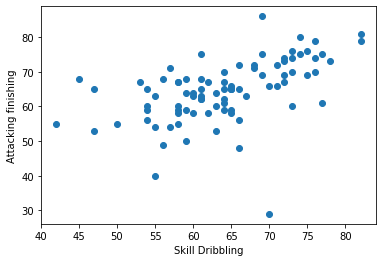

In [12]:
fig, ax = plt.subplots()

ax.scatter(short_list_df["skill_dribbling"], short_list_df["attacking_finishing"])

ax.set_xlabel("Skill Dribbling")
ax.set_ylabel("Attacking finishing")

plt.show()

# Question 2: Using MatPlot Lib Make a Bar Chart (5 Points)
Using the shortlist dataframe make a barchart that shows the top 20 players who have the highest striker_index in descending order. 

1. X-Axis: "long_name"
2. Y-Axis: "striker_index"

<ipython-input-15-83b0b9432eef>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(short_list_df["long_name"], rotation=90)


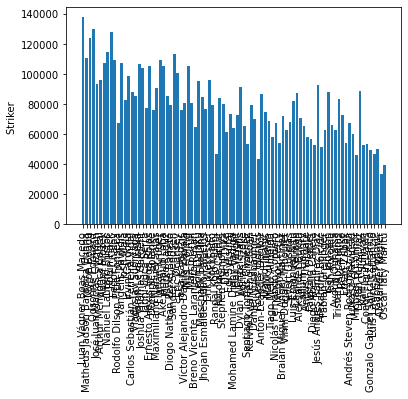

In [15]:
fig, ax = plt.subplots()

ax.bar(short_list_df["long_name"], short_list_df["striker_index"])

ax.set_xticklabels(short_list_df["long_name"], rotation=90)
ax.set_ylabel("Striker ")

plt.show(20)
